In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir("C:/Users/Gaula/Downloads")


In [3]:
df = pd.read_csv("Person.csv")

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
df["Height_meters"] = df["Height"]/100

In [6]:
df.head()

,Gender,Height,Weight,Index,Height_meters
0,Male,174,96,4,1.74
1,Male,189,87,2,1.89
2,Female,185,110,4,1.85
3,Female,195,104,3,1.95
4,Male,149,61,3,1.49


In [7]:
df["BMI"] = df["Weight"]/df["Height_meters"]**2

In [8]:
df.head()

,Gender,Height,Weight,Index,Height_meters,BMI
0,Male,174,96,4,1.74,31.708284
1,Male,189,87,2,1.89,24.355421
2,Female,185,110,4,1.85,32.140248
3,Female,195,104,3,1.95,27.350427
4,Male,149,61,3,1.49,27.476240


In [9]:
df["deviation_from_max_height"] = df["Height"]-df["Height"].max()
df["deviation_from_min_weight"] = df["Weight"]-df["Weight"].min()
df["deviation_from_avg_BMI"] = df["BMI"]-df["BMI"].mean()

In [10]:
df.head()

,Gender,Height,Weight,Index,Height_meters,BMI,deviation_from_max_height,deviation_from_min_weight,deviation_from_avg_BMI
0,Male,174,96,4,1.74,31.708284,-25,46,-6.057000
1,Male,189,87,2,1.89,24.355421,-10,37,-13.409863
2,Female,185,110,4,1.85,32.140248,-14,60,-5.625036
3,Female,195,104,3,1.95,27.350427,-4,54,-10.414857
4,Male,149,61,3,1.49,27.476240,-50,11,-10.289044


In [11]:
df_titanic = pd.read_csv("train (1).csv")

In [12]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
threshold = 0.7
#filter columns with mean missing value higher than threshold
df_titanic = df_titanic[df_titanic.columns[df_titanic.isnull().mean() < threshold]]

#filter rows with mean missing value rate higher than threshold
df_titanic = df_titanic.loc[df_titanic.isnull().mean(axis=1) < threshold]

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
 dft = df_titanic.dropna(thresh = int(df.shape[0]*0.7), axis= 1)

In [16]:
dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
df_titanic.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [19]:
df_titanic.fillna(df_titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [20]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df_titanic["Age"].mean()

29.69911764705882

In [22]:
df_titanic["Age"] = df_titanic["Age"].fillna(df_titanic["Age"].mean())

In [23]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [24]:
df_titanic["Embarked"].mode() 

0    S
dtype: object

In [25]:
df_titanic["Embarked"].fillna("S", inplace = True)

In [26]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
new_data = df_titanic.copy()

In [28]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
meam = new_data["Fare"].mean()

In [30]:
standard = new_data["Fare"].std()

In [31]:
factor = 3 

In [32]:
upper_limit = meam + standard*factor
lower_limit = meam - standard*factor

In [33]:
new_df = new_data[(new_data["Fare"] > lower_limit) & (new_data["Fare"] < upper_limit)]

In [34]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [35]:
print("The length of original data :", len(new_data))
print("The length of new data :", len(new_df))

The length of original data : 891
The length of new data : 871


In [36]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
upper_lim = new_data["Fare"].quantile(0.95)
lower_lim = new_data["Fare"].quantile(0.05)

In [38]:
new_df = new_data[(new_data["Fare"] > lower_lim) & (new_data["Fare"] < upper_lim)]

In [39]:
print("The length of original data :", len(new_data))
print("The length of new data :", len(new_df))

The length of original data : 891
The length of new data : 791


In [40]:
upper_l = new_data["Fare"].quantile(0.95)
lower_l = new_data["Fare"].quantile(0.05)

In [41]:
upper_l

112.07915

In [42]:
lower_l

7.225

In [43]:
new_df = (np.where(new_data["Fare"] < 112.07915,112.07915,new_data["Fare"]))

In [44]:
print("The length of original data :", len(new_data))
print("The length of new data :", len(new_df))

The length of original data : 891
The length of new data : 891


## Scaling

In [45]:
maximum= new_data["Age"].max()
minimum= new_data["Age"].min()

In [46]:
new_data["Age"] = (new_data["Age"]- minimum)/(maximum-minimum)

In [47]:
maximu= new_data["Fare"].max()
minimu= new_data["Fare"].min()

In [48]:
new_data["Fare"] = (new_data["Fare"]- minimu)/(maximu-minimu)

In [49]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,S


In [50]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,S


In [51]:
new_data = df_titanic.copy()




In [52]:
meam = new_data["Age"].mean()
stan = new_data["Age"].std()

In [53]:
meamF = new_data["Fare"].mean()
stanF = new_data["Fare"].std()

In [54]:
new_data['Age'] = (new_data['Age']-meam)/stan
new_data['Fare'] = (new_data['Fare']-meamF)/stanF

In [55]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592148,1,0,A/5 21171,-0.502163,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638430,1,0,PC 17599,0.786404,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284503,0,0,STON/O2. 3101282,-0.488580,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407697,1,0,113803,0.420494,S
4,5,0,3,"Allen, Mr. William Henry",male,0.407697,0,0,373450,-0.486064,S


In [56]:
new_data = df_titanic.copy()

In [57]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaling = MinMaxScaler()
scaling.fit_transform(new_data[['Age','Fare']])

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.36792055, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

In [59]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(new_data[['Age','Fare']])

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

## Binning

In [60]:
from sklearn.preprocessing import Binarizer

In [62]:
bins = [0, 18, 40, 100]

In [63]:
groupnames = ["Children","Adult","Old"]

In [64]:
new_data["Age_group"] = pd.cut(new_data["Age"],bins,labels = groupnames)

In [65]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [66]:
import seaborn as sns

<AxesSubplot:xlabel='Age_group', ylabel='count'>

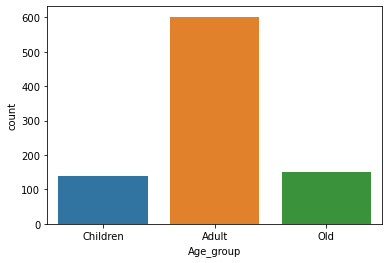

In [67]:
sns.countplot(x= 'Age_group', data = new_data)

In [68]:
new_data["Age_group"].value_counts()

Adult       602
Old         150
Children    139
Name: Age_group, dtype: int64

## Encoding

In [69]:
new_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [70]:
new_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [71]:
## Integer encoding
from sklearn.preprocessing import LabelEncoder

In [72]:
labelencoder = LabelEncoder()
label = labelencoder.fit_transform(new_data["Sex"])
label

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [73]:
new_data.drop("Sex", axis= 1, inplace = True)

In [74]:
new_data["Sex"] = label

In [75]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,Adult,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,Adult,1


In [76]:
new_data = df_titanic.copy()

In [77]:
# one hot encoding
data = pd.get_dummies(new_data["Sex"])
data

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [78]:
new_data.drop("Sex", axis= 1, inplace = True)

In [79]:
new_data["Male"] = data["male"].to_list()
new_data["Female"] = data["female"].to_list()

In [80]:
new_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,1,0


In [81]:
data = pd.get_dummies(new_data["Embarked"])
data

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [82]:
new_data["C"] = data["C"].to_list()
new_data["Q"] = data["Q"].to_list()
new_data["S"] = data["S"].to_list()

In [83]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1,0,0,0,1


In [84]:
# Variable Transformation
# Logarithmic transformation
house = pd.read_csv("house_data.csv")

In [85]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


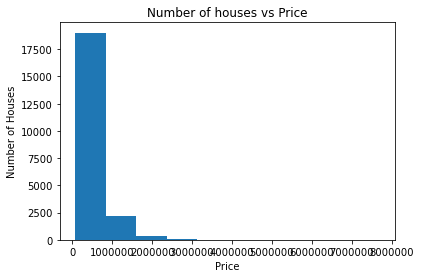

In [86]:
import matplotlib.pyplot as plt
plt.hist(house["price"])
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
plt.ticklabel_format(style='plain')

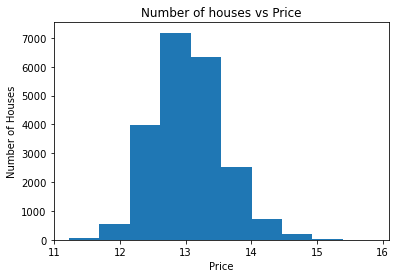

In [87]:
house["price"] = np.log(house["price"])
plt.hist(house["price"], log = False)
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
plt.ticklabel_format(style='plain')

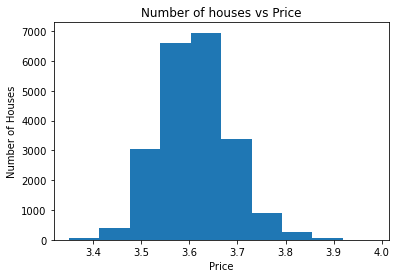

In [88]:
house["price"] = np.sqrt(house["price"])
plt.hist(house["price"], log = False)
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
plt.ticklabel_format(style='plain')

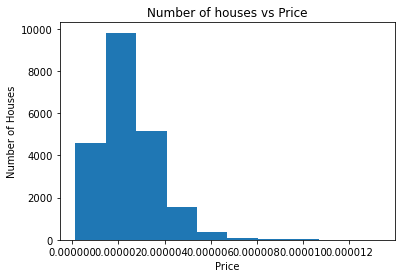

In [89]:
house = pd.read_csv("house_data.csv")
house["price"] = np.reciprocal(house["price"])
plt.hist(house["price"], log = False)
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
plt.ticklabel_format(style='plain')

E:\ana\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [inf, inf] is not finite

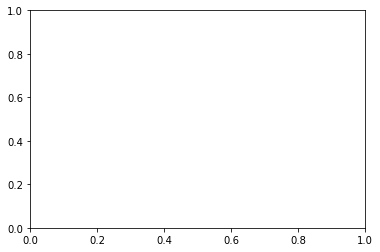

In [90]:
house = pd.read_csv("house_data.csv")
house["price"] = np.exp(house["price"])
plt.hist(house["price"])
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
plt.ticklabel_format(style='plain')

## Date and Time Engineering

In [7]:
foot = pd.read_csv("results.csv")

In [8]:
foot.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [18]:
import datetime
from datetime import date

In [9]:
foot["date"] = pd.to_datetime(foot['date'],format='%Y-%m-%d')

In [10]:
foot["date"]

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
43081   2021-12-15
43082   2021-12-15
43083   2021-12-18
43084   2021-12-18
43085   2021-12-18
Name: date, Length: 43086, dtype: datetime64[ns]

In [11]:
foot['year'] = foot["date"].dt.year

In [12]:
foot['year'] 

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
43081    2021
43082    2021
43083    2021
43084    2021
43085    2021
Name: year, Length: 43086, dtype: int64

In [13]:
foot['month'] = foot["date"].dt.month

In [19]:
foot['passed_years'] = datetime.now().year - (foot['year'])
foot['passed_months'] = datetime.now().month  - (foot['month']) 

AttributeError: module 'datetime' has no attribute 'now'

In [15]:
foot['passed_months']

KeyError: 'passed_months'

In [108]:
foot['day_name'] = foot["date"].dt.day

In [127]:
foot[['date','year','month','passed_years','passed_months','day_name']].head()

,date,year,month,passed_years,passed_months,day_name
0,1872-11-30,1872,11,149,1,30
1,1873-03-08,1873,3,148,9,8
2,1874-03-07,1874,3,147,9,7
3,1875-03-06,1875,3,146,9,6
4,1876-03-04,1876,3,145,9,4
